## Cleaning and preparing msrp and specs data

In [47]:
import pandas as pd
import numpy as np
import pickle

%matplotlib inline

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 150)

In [48]:
# 234 rows, 32,317 columns
# rows are the specs, columns are the individual cars

read_df = pd.read_csv('fullspecs.csv')

In [49]:
read_df = read_df.set_index('Unnamed: 0')
read_df.index.names = ['specs']

In [50]:
read_df.head()

,2019 Acura RDX Specs: FWD w/Technology Pkg,2019 Acura RDX Specs: FWD w/Advance Pkg,2019 Acura RDX Specs: FWD w/A-Spec Pkg,2019 Acura RDX Specs: FWD,2019 Acura RDX Specs: AWD w/Technology Pkg,2019 Acura RDX Specs: AWD w/Advance Pkg,2019 Acura RDX Specs: AWD w/A-Spec Pkg,2018 Acura RDX Specs: AWD,2018 Acura RDX Specs: FWD w/Technology/AcuraWatch Plus Pkg,2018 Acura RDX Specs: FWD w/Technology Pkg,2018 Acura RDX Specs: FWD w/Advance Pkg,2018 Acura RDX Specs: FWD w/AcuraWatch Plus,2018 Acura RDX Specs: FWD,2018 Acura RDX Specs: AWD w/Technology/AcuraWatch Plus Pkg,2018 Acura RDX Specs: AWD w/Technology Pkg,2018 Acura RDX Specs: AWD w/Advance Pkg,2018 Acura RDX Specs: AWD w/AcuraWatch Plus,2016 Acura RDX Specs: AWD 4-Door,2016 Acura RDX Specs: FWD 4-Door Tech/AcuraWatch Plus Pkg,2016 Acura RDX Specs: FWD 4-Door Tech Pkg,2016 Acura RDX Specs: FWD 4-Door Advance Pkg,2016 Acura RDX Specs: FWD 4-Door AcuraWatch Plus Pkg,2016 Acura RDX Specs: FWD 4-Door,2016 Acura RDX Specs: AWD 4-Door Tech/AcuraWatch Plus Pkg,2016 Acura RDX Specs: AWD 4-Door Tech Pkg,2016 Acura RDX Specs: AWD 4-Door Advance Pkg,2016 Acura RDX Specs: AWD 4-Door AcuraWatch Plus Pkg,2015 Acura RDX Specs: AWD 4-Door,2015 Acura RDX Specs: FWD 4-Door Tech Pkg,2015 Acura RDX Specs: FWD 4-Door,2015 Acura RDX Specs: AWD 4-Door Tech Pkg,2014 Acura RDX Specs: AWD 4-Door,2014 Acura RDX Specs: FWD 4-Door Tech Pkg,2014 Acura RDX Specs: FWD 4-Door,2014 Acura RDX Specs: AWD 4-Door Tech Pkg,2013 Acura RDX Specs: AWD 4-Door,2013 Acura RDX Specs: FWD 4-Door Tech Pkg,2013 Acura RDX Specs: FWD 4-Door,2013 Acura RDX Specs: AWD 4-Door Tech Pkg,2012 Acura RDX Specs: AWD 4-Door,2012 Acura RDX Specs: FWD 4-Door Tech Pkg,2012 Acura RDX Specs: FWD 4-Door,2012 Acura RDX Specs: AWD 4-Door Tech Pkg,2011 Acura RDX Specs: AWD 4-Door,2011 Acura RDX Specs: FWD 4-Door Tech Pkg,2011 Acura RDX Specs: FWD 4-Door,2011 Acura RDX Specs: AWD 4-Door Tech Pkg,2010 Acura RDX Specs: AWD 4-Door,2010 Acura RDX Specs: FWD 4-Door Tech Pkg,2010 Acura RDX Specs: FWD 4-Door,2010 Acura RDX Specs: AWD 4-Door Tech Pkg,2009 Acura RDX Specs: AWD 4-Door,2009 Acura RDX Specs: AWD 4-Door Tech Pkg,2008 Acura RDX Specs: 4WD 4-Door,2008 Acura RDX Specs: 4WD 4-Door Tech Pkg,2007 Acura RDX Specs: AWD 4-Door,2007 Acura RDX Specs: AWD 4-Door Tech Pkg,2019 Acura MDX Specs: FWD,2019 Acura MDX Specs: SH-AWD w/Technology/Entertainment Pkg,2019 Acura MDX Specs: SH-AWD w/Technology/A-Spec Pkg,2019 Acura MDX Specs: SH-AWD w/Technology Pkg,2019 Acura MDX Specs: SH-AWD w/Advance/Entertainment Pkg,2019 Acura MDX Specs: SH-AWD w/Advance Pkg,2019 Acura MDX Specs: SH-AWD Sport Hybrid w/Technology Pkg,2019 Acura MDX Specs: SH-AWD Sport Hybrid w/Advance Pkg,2019 Acura MDX Specs: SH-AWD,2019 Acura MDX Specs: FWD w/Technology/Entertainment Pkg,2019 Acura MDX Specs: FWD w/Technology Pkg,2019 Acura MDX Specs: FWD w/Advance/Entertainment Pkg,2019 Acura MDX Specs: FWD w/Advance Pkg,2018 Acura MDX Specs: FWD,2018 Acura MDX Specs: SH-AWD w/Technology/Entertainment Pkg,2018 Acura MDX Specs: SH-AWD w/Technology Pkg,2018 Acura MDX Specs: SH-AWD w/Advance/Entertainment Pkg,2018 Acura MDX Specs: SH-AWD w/Advance Pkg,...,2010 Volvo XC90 Specs: AWD 4-Door V8,2010 Volvo XC90 Specs: AWD 4-Door I6 R-Design,2009 Volvo XC90 Specs: AWD 4-Door I6,2009 Volvo XC90 Specs: FWD 4-Door I6 w/Sunroof/3rd Row,2009 Volvo XC90 Specs: FWD 4-Door I6 w/Sunroof,2009 Volvo XC90 Specs: FWD 4-Door I6 R-Design,2009 Volvo XC90 Specs: FWD 4-Door I6,2009 Volvo XC90 Specs: AWD 4-Door I6 w/Sunroof/3rd Row,2009 Volvo XC90 Specs: AWD 4-Door I6 w/Sunroof,2009 Volvo XC90 Specs: AWD 4-Door V8 R-Design,2009 Volvo XC90 Specs: AWD 4-Door V8,2009 Volvo XC90 Specs: AWD 4-Door I6 R-Design,2008 Volvo XC90 Specs: AWD 4-Door I6,2008 Volvo XC90 Specs: FWD 4-Door I6 w/Snrf/3rd Row,2008 Volvo XC90 Specs: FWD 4-Door I6 w/Snrf,2008 Volvo XC90 Specs: FWD 4-Door I6,2008 Volvo XC90 Specs: AWD 4-Door I6 w/Snrf/3rd Row,2008 Volvo XC90 Specs: AWD 4-Door I6 w/Snrf,2008 Volvo XC90 Specs: AWD 4-Door V8 Sport,2008 Volvo XC9

In [51]:
cars_df = read_df.transpose()

In [52]:
cars_df.head()

specs,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume (ft³),Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)",Cargo Volume to Seat 1 (ft³),Cargo Volume to Seat 2 (ft³),Cargo Volume to Seat 3 (ft³),"Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Engine Order Code,SAE Net Torque @ RPM,Fuel System,Engine Type,SAE Net Horsepower @ RPM,Displacement,First Gear Ratio (:1),Sixth Gear Ratio (:1),Trans Description Cont.,Fourth Gear Ratio (:1),Seventh Gear Ratio (:1),Trans Order Code,Second Gear Ratio (:1),Reverse Ratio (:1),Trans Description Cont. Again,Fifth Gear Ratio (:1),Eighth Gear Ratio (:1),Trans Type,Third Gear Ratio (:1),Final Drive Axle Ratio (:1),Brake Type,Rear Brake Rotor Diam x Thickness (in),Disc - Rear (Yes or ),Brake ABS System,Drum - Rear (Yes or ),Front Brake Rotor Diam x Thickness (in),Disc - Front (Yes or ),Rear Drum Diam x Width (in),Steering Type,Turning Diameter - Curb to Curb (ft),Front Tire Order Code,Spare Tire Size,Front Tire Size,Rear Tire Order Code,Rear Tire Size,Spare Tire Order Code,Front Wheel Size (in),Spare Wheel Material,Front Wheel Material,Rear Wheel Size (in),Rear Wheel Material,...,EPA MPG Equivalent - Combined,Battery Range (mi),Axle Ratio (:1) - Rear,Axle Ratio (:1) - Front,Gross Axle Wt Rating - Front (lbs),Gross Axle Wt Rating - Rear (lbs),EPA MPG Equivalent - City,EPA MPG Equivalent - Hwy,Maintenance Note,Emissions Miles/km,Emissions Years,Ninth Gear Ratio (:1),EPA Air Pollution Score,Rear Door Type,Curb Weight - Front (lbs),Gross Combined Wt Rating (lbs),Curb Weight - Rear (lbs),"Ground Clearance, Rear (in)",Step Up Height - Front (in),"Length, Overall w/rear bumper (in)",Ground to Top of Load Floor (in),Side Door Opening Height (in),"Overhang, Front (in)",Step Up Height - Side (in),"Ground Clearance, Front (in)",Side Door Opening Width (in),"Overhang, Rear w/bumper (in)",Cargo Volume to Seat 4 (ft³),Cargo Area Length @ Floor to Seat 4 (in),Cargo Area Length @ Floor to Console (in),"Aux Fuel Tank Capacity, Approx (gal)",Fuel Tank Location,Aux Fuel Tank Location,Trans Power Take Off,Tenth Gear Ratio (:1),"Steering Ratio (:1), On Center","Steering Ratio (:1), At Lock",Spare Tire Capacity (lbs),Front Tire Capacity (lbs),Revolutions/Mile @ 45 mph - Spare,Revolutions/Mile @ 45 mph - Front,Rear Tire Capacity (lbs),Revolutions/Mile @ 45 mph - Rear,Axle Capacity - Front (lbs),Spring Capacity - Front (lbs),Axle Capacity - Rear (lbs),Spring Capacity - Rear (lbs),Maximum Alternator Watts,Fifth Wheel Hitch - Max Trailer Wt. (lbs),Fifth Wheel Hitch - Max Tongue Wt. (lbs),"Length, Overall w/o rear bumper (in)",Front Bumper to Back of Cab (in),"Frame Width, Rear (in)",Cab to Axle (in),"Overhang, Rear w/o bumper (in)",Ground to Top of Frame (in),Cab to End of Frame (in),"Cargo Box Width @ Top, Rear (in)",Cargo Volume (ft³),Cargo Box Width @ Floor (in),Ext'd Cab Cargo Volume (ft³),Cargo Box Length @ Floor (in),Tailgate Width (in),Drivetrain Note,Emissions Note,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,Small Sport Utility Vehicles 2WD,3790,55,41.6,56.6,104,38.3,59.7,49.9,39.6,38.4,108.3,5.7,64.2,74.8,64.7,65.7

In [53]:
# make the columns and index lower case, strip leading and trailing whitespace
# for columns only, convert internal spaces to underscores

cars_df.columns = cars_df.columns.str.lower().str.strip().str.replace(' ', '_')
cars_df.index = cars_df.index.str.lower().str.strip()

In [28]:
cars_df.head()

specs,msrp,gas_mileage,engine,epa_class,style_name,drivetrain,passenger_capacity,passenger_doors,body_style,transmission,epa_classification,base_curb_weight_(lbs),front_hip_room_(in),front_leg_room_(in),second_shoulder_room_(in),passenger_volume_(ft³),second_head_room_(in),front_shoulder_room_(in),second_hip_room_(in),front_head_room_(in),second_leg_room_(in),wheelbase_(in),min_ground_clearance_(in),"track_width,_front_(in)","width,_max_w/o_mirrors_(in)","track_width,_rear_(in)","height,_overall_(in)",cargo_volume_to_seat_1_(ft³),cargo_volume_to_seat_2_(ft³),cargo_volume_to_seat_3_(ft³),"fuel_tank_capacity,_approx_(gal)",fuel_economy_est-combined_(mpg),epa_fuel_economy_est_-_city_(mpg),epa_fuel_economy_est_-_hwy_(mpg),engine_order_code,sae_net_torque_@_rpm,fuel_system,engine_type,sae_net_horsepower_@_rpm,displacement,first_gear_ratio_(:1),sixth_gear_ratio_(:1),trans_description_cont.,fourth_gear_ratio_(:1),seventh_gear_ratio_(:1),trans_order_code,second_gear_ratio_(:1),reverse_ratio_(:1),trans_description_cont._again,fifth_gear_ratio_(:1),eighth_gear_ratio_(:1),trans_type,third_gear_ratio_(:1),final_drive_axle_ratio_(:1),brake_type,rear_brake_rotor_diam_x_thickness_(in),disc_-_rear_(yes_or___),brake_abs_system,drum_-_rear_(yes_or___),front_brake_rotor_diam_x_thickness_(in),disc_-_front_(yes_or___),rear_drum_diam_x_width_(in),steering_type,turning_diameter_-_curb_to_curb_(ft),front_tire_order_code,spare_tire_size,front_tire_size,rear_tire_order_code,rear_tire_size,spare_tire_order_code,front_wheel_size_(in),spare_wheel_material,front_wheel_material,rear_wheel_size_(in),rear_wheel_material,...,epa_mpg_equivalent_-_combined,battery_range_(mi),axle_ratio_(:1)_-_rear,axle_ratio_(:1)_-_front,gross_axle_wt_rating_-_front_(lbs),gross_axle_wt_rating_-_rear_(lbs),epa_mpg_equivalent_-_city,epa_mpg_equivalent_-_hwy,maintenance_note,emissions_miles/km,emissions_years,ninth_gear_ratio_(:1),epa_air_pollution_score,rear_door_type,curb_weight_-_front_(lbs),gross_combined_wt_rating_(lbs),curb_weight_-_rear_(lbs),"ground_clearance,_rear_(in)",step_up_height_-_front_(in),"length,_overall_w/rear_bumper_(in)",ground_to_top_of_load_floor_(in),side_door_opening_height_(in),"overhang,_front_(in)",step_up_height_-_side_(in),"ground_clearance,_front_(in)",side_door_opening_width_(in),"overhang,_rear_w/bumper_(in)",cargo_volume_to_seat_4_(ft³),cargo_area_length_@_floor_to_seat_4_(in),cargo_area_length_@_floor_to_console_(in),"aux_fuel_tank_capacity,_approx_(gal)",fuel_tank_location,aux_fuel_tank_location,trans_power_take_off,tenth_gear_ratio_(:1),"steering_ratio_(:1),_on_center","steering_ratio_(:1),_at_lock",spare_tire_capacity_(lbs),front_tire_capacity_(lbs),revolutions/mile_@_45_mph_-_spare,revolutions/mile_@_45_mph_-_front,rear_tire_capacity_(lbs),revolutions/mile_@_45_mph_-_rear,axle_capacity_-_front_(lbs),spring_capacity_-_front_(lbs),axle_capacity_-_rear_(lbs),spring_capacity_-_rear_(lbs),maximum_alternator_watts,fifth_wheel_hitch_-_max_trailer_wt._(lbs),fifth_wheel_hitch_-_max_tongue_wt._(lbs),"length,_overall_w/o_rear_bumper_(in)",front_bumper_to_back_of_cab_(in),"frame_width,_rear_(in)",cab_to_axle_(in),"overhang,_rear_w/o_bumper_(in)",ground_to_top_of_frame_(in),cab_to_end_of_frame_(in),"cargo_box_width_@_top,_rear_(in)",cargo_volume_(ft³),cargo_box_width_@_floor_(in),ext'd_cab_cargo_volume_(ft³),cargo_box_length_@_floor_(in),tailgate_width_(in),drivetrain_note,emissions_note,fourth_hip_room_(in),fourth_leg_room_(in),fourth_shoulder_room_(in),fourth_head_room_(in),fifth_shoulder_room_(in),fifth_head_room_(in),fifth_hip_room_(in),fifth_leg_room_(in),corrosion_note,hybrid/electric_components_note
2019 acura rdx specs: fwd w/technology pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,Small Sport Utility Vehicles 2WD,3790,55,41.6,56.6,104,38.3,59.7,49.9,39.6,38.4,108.3,5.7,64.2,74.8,64.

In [54]:
# make all string entries lower case

cars_df = cars_df.apply(lambda x: x.str.lower())

In [55]:
# drop columns with info on very specific features because they tend to be NaN values

start_drop = cars_df.columns.get_loc('other_features')
end_drop = cars_df.columns.get_loc('hybrid/electric_components_note') + 1
cars_df = cars_df.drop(cars_df.iloc[:, start_drop:end_drop], axis=1)

In [ ]:
# pickle the cars_df dataframe so I can start adding columns, cutting 
# columns that aren't useful and reformatting data

with open('cars_df_most_columns.pickle', 'wb') as write_file:
    pickle.dump(cars_df, write_file)

In [56]:
print(cars_df.shape)
cars_df.head()

(32316, 98)


specs,msrp,gas_mileage,engine,epa_class,style_name,drivetrain,passenger_capacity,passenger_doors,body_style,transmission,epa_classification,base_curb_weight_(lbs),front_hip_room_(in),front_leg_room_(in),second_shoulder_room_(in),passenger_volume_(ft³),second_head_room_(in),front_shoulder_room_(in),second_hip_room_(in),front_head_room_(in),second_leg_room_(in),wheelbase_(in),min_ground_clearance_(in),"track_width,_front_(in)","width,_max_w/o_mirrors_(in)","track_width,_rear_(in)","height,_overall_(in)",cargo_volume_to_seat_1_(ft³),cargo_volume_to_seat_2_(ft³),cargo_volume_to_seat_3_(ft³),"fuel_tank_capacity,_approx_(gal)",fuel_economy_est-combined_(mpg),epa_fuel_economy_est_-_city_(mpg),epa_fuel_economy_est_-_hwy_(mpg),engine_order_code,sae_net_torque_@_rpm,fuel_system,engine_type,sae_net_horsepower_@_rpm,displacement,first_gear_ratio_(:1),sixth_gear_ratio_(:1),trans_description_cont.,fourth_gear_ratio_(:1),seventh_gear_ratio_(:1),trans_order_code,second_gear_ratio_(:1),reverse_ratio_(:1),trans_description_cont._again,fifth_gear_ratio_(:1),eighth_gear_ratio_(:1),trans_type,third_gear_ratio_(:1),final_drive_axle_ratio_(:1),brake_type,rear_brake_rotor_diam_x_thickness_(in),disc_-_rear_(yes_or___),brake_abs_system,drum_-_rear_(yes_or___),front_brake_rotor_diam_x_thickness_(in),disc_-_front_(yes_or___),rear_drum_diam_x_width_(in),steering_type,turning_diameter_-_curb_to_curb_(ft),front_tire_order_code,spare_tire_size,front_tire_size,rear_tire_order_code,rear_tire_size,spare_tire_order_code,front_wheel_size_(in),spare_wheel_material,front_wheel_material,rear_wheel_size_(in),rear_wheel_material,spare_wheel_size_(in),suspension_type_-_front,suspension_type_-_rear_(cont.),suspension_type_-_rear,suspension_type_-_front_(cont.),air_bag-frontal-driver,air_bag-frontal-passenger,air_bag-passenger_switch_(on/off),air_bag-side_body-front,air_bag-side_body-rear,air_bag-side_head-front,air_bag-side_head-rear,brakes-abs,child_safety_rear_door_locks,daytime_running_lights,traction_control,night_vision,rollover_protection_bars,fog_lamps,parking_aid,tire_pressure_monitor,back-up_camera,stability_control
2019 acura rdx specs: fwd w/technology pkg,"$40,600",22 mpg city/28 mpg hwy,"turbo premium unleaded i-4, 2.0 l",small sport utility vehicles 2wd,fwd w/technology pkg,front wheel drive,5,4,sport utility,transmission: 10-speed automatic -inc: sequent...,small sport utility vehicles 2wd,3790,55,41.6,56.6,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,28,NaN,280 @ 1600,gasoline direct injection,turbo premium unleaded i-4,272 @ 6500,2.0 l/122,5.25,1.00,automatic w/od,1.60,0.78,NaN,3.27,3.97,NaN,1.30,0.65,10,2.19,4.17,4-wheel disc,12.2,yes,4-wheel,NaN,12.4,yes,NaN,rack-pinion,39,NaN,NaN,p235/55hr19,NaN,p235/55hr19,NaN,19 x 8,NaN,aluminum,19 x 8,aluminum,NaN,strut,multi-link,multi-link,strut,yes,yes,no,yes,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,yes,yes
2019 acura rdx specs: fwd w/advance pkg,"$45,500",22 mpg city/28 mpg hwy,"turbo premium unleaded i-4, 2.0 l",small sport utility vehicles 2wd,fwd w/advance pkg,front wheel drive,5,4,sport utility,transmission: 10-speed automatic -inc: sequent...,small sport utility vehicles 2wd,3829,55,41.6,56.6,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,28,NaN,280 @ 1600,gasoline direct injection,turbo premium unleaded i-4,272 @ 6500,2.0 l/122,5.25,1.00,automatic w/od,1.60,0.78,NaN,3.27,3.97,NaN,1.30,0.65,10,2.19,4.17,4-wheel disc,12.2,yes,4-wheel,NaN,12.4,yes,NaN,rack-pinion,39,NaN,NaN,p235/55hr19,NaN,p235/55hr19,NaN,19 x 8,NaN,aluminum,19 x 8,aluminum,NaN,strut,multi-link,multi-link,strut,yes,yes,no,yes,no,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,yes
2019 acura rdx specs: fwd w/a-spec pkg,"$43,600",22 mpg city/27 mpg hwy,"turbo premium unleaded i-4, 2.0 l",small sport utility vehicles 2wd,fwd w/a-spec pkg,front wheel drive,5,4,sport utility,transmission: 10-speed automatic -inc: sequent...,small sport utility vehicles 2wd,3821,55,41.6,56.6,104,NaN,NaN,NaN,NaN,N

In [ ]:
# create column for year make and model, another for year, and another for make

cars_df['year_make_model'] = cars_df.index.str.split(' specs')
cars_df['year_make_model'] = cars_df.apply(lambda row: row['year_make_model'][0], axis = 1)

cars_df['year'] = cars_df['year_make_model'].str.split()
cars_df['year'] = cars_df.apply(lambda row: row['year'][0], axis = 1).astype(int)

cars_df['make'] = cars_df['year_make_model'].str.split()
cars_df['make'] = cars_df.apply(lambda row: row['make'][1], axis = 1)

In [ ]:
# correct a few makes with 2 words separated by a space

make_dict = {
    'land':'land-rover',
    'alfa':'alfa-romeo',
    'aston':'aston-martin',
    'mini':'mini-cooper'
}

cars_df['make'] = cars_df['make'].apply(lambda x: make_dict[x] if x in make_dict.keys() else x)

In [ ]:
# drop cars from before 2015 and any entries without prices

cars_df = cars_df[cars_df['year'] >= 2015]
cars_df = cars_df.dropna(subset=['msrp'])

In [ ]:
cars_df.shape

### Parse, rename, and cast columns to int, float, bool, etc

In [ ]:
cars_df = cars_df.rename(columns={'epa_fuel_economy_est_-_city_(mpg)': 'mpg_city',
                        'epa_fuel_economy_est_-_hwy_(mpg)': 'mpg_hwy',
                        'sae_net_horsepower_@_rpm': 'hpower',
                        'base_curb_weight_(lbs)': 'weight',
                        'front_leg_room_(in)': 'leg_room',
                        'passenger_volume_(ft³)': 'passenger_vol',
                        'turning_diameter_-_curb_to_curb_(ft)': 'turning_diameter',
                        'brakes-abs': 'abs_brakes',
                        'rollover_protection_bars': 'rollover_bars'
                                 })

cars_df = cars_df[['year_make_model', 'year', 'make', 'msrp', 
                   'mpg_city', 'mpg_hwy', 'hpower', 'weight', 
                   'leg_room', 'passenger_vol', 'turning_diameter', 
                   'body_style', 'drivetrain', 
                   'fuel_system', 'engine_type', 'brake_type', 
                   'abs_brakes', 'child_safety_rear_door_locks', 
                   'daytime_running_lights', 'traction_control', 
                   'night_vision', 'rollover_bars', 'fog_lamps', 
                   'back-up_camera']]

In [ ]:
# drop rows with NaNs in the numeric values
# before droppinig these check which ones they are with some more eda
# also verify how many rows I'm dropping
# look at time or whatever my cutoff is first, so I get accurate counts for the above metrics

cars_df = cars_df.dropna(subset=['msrp', 'mpg_city', 'mpg_hwy', 'hpower', 'weight', 
                   'leg_room', 'passenger_vol', 'turning_diameter', 'engine_type'])

In [ ]:
print(cars_df.shape)
cars_df.head()

In [ ]:
# check the columns with string data for entries that I can't use

for col in ['drivetrain', 'brake_type', 'fuel_system', 'engine_type', 'abs_brakes', 'child_safety_rear_door_locks', 
            'daytime_running_lights', 'traction_control', 'night_vision', 'rollover_bars', 'fog_lamps', 'back-up_camera']:
    print(cars_df[col].value_counts(dropna=False))

In [ ]:
# drop abs_brakes, traction_control, night_vision
cars_df = cars_df[['year', 'make', 'year_make_model', 'msrp', 
                   'mpg_city', 'mpg_hwy', 'hpower', 'weight', 
                   'leg_room', 'passenger_vol', 'turning_diameter', 
                   'body_style', 'drivetrain', 'brake_type',
                   'fuel_system', 'engine_type',
                   'child_safety_rear_door_locks', 
                   'daytime_running_lights', 'rollover_bars',
                   'fog_lamps', 'back-up_camera']] # 'rating', 

In [ ]:
# drop rows with '- tbd -' values in numerical columns

mask = (cars_df.mpg_hwy != '- tbd -') & (cars_df.mpg_city != '- tbd -') & (
    cars_df['weight'] != '- tbd -') & (cars_df['leg_room'] != '- tbd -') & (
    cars_df['passenger_vol'] != '- tbd -') & (cars_df['turning_diameter'] != '- tbd -') & (
    cars_df['brake_type'] != '- tbd -') & (cars_df['body_style'] != '- tbd -') & (
    cars_df['drivetrain'] != '- tbd -') & (cars_df['brake_type'] != '- tbd -')

cars_df = cars_df[mask]

In [ ]:
print(cars_df.shape)
cars_df.head()

In [27]:
# the dataframe is pretty clean, so pickle it before I start changing datatypes

with open('cars_df_cleaned_not_cast.pickle', 'wb') as write_file:
    pickle.dump(cars_df, write_file)

In [42]:
cars_df.dtypes

specs
year                              int64
make                             object
year_make_model                  object
msrp                              int64
mpg_city                          int64
mpg_hwy                           int64
hpower                            int64
weight                            int64
leg_room                        float64
passenger_vol                   float64
turning_diameter                float64
body_style                       object
drivetrain                       object
brake_type                       object
fuel_system                      object
engine_type                      object
child_safety_rear_door_locks     object
daytime_running_lights           object
rollover_bars                    object
fog_lamps                        object
back-up_camera                   object
dtype: object

In [29]:
cars_df['msrp'] = cars_df['msrp'].str.strip('$').str.replace(',','').astype(int)
cars_df['mpg_city'] = cars_df['mpg_city'].str[:2].astype(int)
cars_df['mpg_hwy'] = cars_df['mpg_hwy'].str[:2].astype(int)
cars_df['hpower'] = cars_df['hpower'].str.split(' @ ')
cars_df['hpower'] = cars_df.apply(lambda row: row['hpower'][0], axis = 1).astype(int)
cars_df['weight'] = cars_df['weight'].astype(int)
cars_df['leg_room'] = cars_df['leg_room'].astype(float)
cars_df['passenger_vol'] = cars_df['passenger_vol'].astype(float)
cars_df['turning_diameter'] = cars_df['turning_diameter'].astype(float)

/home/dsalorio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dsalorio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dsalorio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [30]:
# the dataframe is ready to model, pickle to create a clean df I can return to

with open('cars_df_ready_to_model.pickle', 'wb') as write_file:
    pickle.dump(cars_df, write_file)

## Scrape ratings data

In [31]:
import requests
from bs4 import BeautifulSoup

In [32]:
# get the make, model, and year into the format used in the url: 'make_model_year'
cars_df['make_model_year'] = cars_df['year_make_model'].str.split(' ', 2)
cars_df['make_model_year'] = cars_df.apply(lambda row: row['make_model_year'][1] + '_' +
                                           row['make_model_year'][2].replace(' ', '-') + '_' + 
                                           row['make_model_year'][0], axis =1)

/home/dsalorio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dsalorio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
# get the scraping code to work on an example 

url = 'https://www.thecarconnection.com/overview/buick_enclave_2018'

response = requests.get(url)
response.status_code

200

In [34]:
page = response.text
soup = BeautifulSoup(page, "lxml")

In [35]:
print(soup.prettify())

<!DOCTYPE html>
<html data-addr="10.16.88.242" data-debug="false" data-env="production" data-layout="desktop" data-site="77637" data-site-id="40070" data-time="2019-09-11T12:45:41-0700" data-tmplt="77637" lang="en" version="HTML+RDFa 1.0" xmlns:og="https://ogp.me/ns#">
 <head>
  <script src="//cdn.districtm.ca/merge/all.ib.hg.js" type="text/javascript">
  </script>
  <script>
   var _sf_startpt = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<t.length;o++)r(t[o]);return r}({1:[function(e,n,t){function r(){}function o(e,n,t){return function(){return i(e,[c.now()].concat(u(arguments)),n?null:this,t),n?void 0:this}}var i=e("handle"),a=e(3),u=e(4),f=e("ee").get("tracer"),

In [36]:
for value in soup.find_all('span'): 
    print(value, value.findNextSibling(), '\n')

<span class="line"></span> None 

<span class="line"></span> None 

<span class="line"></span> None 

<span class="line"></span> None 

<span class="line"></span> None 

<span class="line"></span> None 

<span>2019</span> None 

<span>2019</span> None 

<span>Home</span> None 

<span class="start-script">
<script>
        $('.user-ratings .star-actual').each(function(index){
            $(this).css('width', $(this).data('width') + 'px');
        });
    </script>
</span> None 

<span class="contest-logo"></span> <div class="voting">
<div id="bctb-year">2019</div>
<div id="title1">The Car Connection</div>
<div id="link">
<a href="/driverschoice">See the winner »</a>
</div>
</div> 

<span class="contest-logo"></span> <div id="bctb-year">2018</div> 

<span>Nominee</span> None 

<span>Martin Padgett</span> None 

<span>Editorial Director</span> <div class="date">May 22, 2018</div> 

<span id="expand-bts">…</span> None 

<span class="ratingNumber">9</span> None 

<span class="ratingNumber">

In [37]:
# should be 7.8

float(soup.find(class_ = 'expert-ratings-block').find('span').text)

7.8

In [38]:
def get_rating(make_model_year):
    """
    Using the make_model_year (eg buick_enclave_2018) go to thecarconnection.com and get the corresponding rating
    
    If there is no rating for that car, return NaN and print the url so you know which cars don't have ratings
    """
    
    url = 'https://thecarconnection.com/overview/' + make_model_year
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    try:
        if float(soup.find(class_ = 'expert-ratings-block').find('span').text):
            return float(soup.find(class_ = 'expert-ratings-block').find('span').text)
        else:
            return np.NaN
    except AttributeError:
        print(url)
        return np.NaN

In [234]:
# missing ratings for more cars than I was expecting
# mainly missing reviews for luxury, foreign, and older cars

cars_df['rating'] = cars_df['make_model_year'].apply(get_rating)

https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2019
https://thecarconnection.com/overview/alfa_romeo-giulia_2018
https://thecarconnection.com/overview/alfa_romeo-giulia_2018
https://thecarconnection.com/overview/alfa_romeo-giulia_2018
https://thecarconnection

https://thecarconnection.com/overview/fiat_500l_2015
https://thecarconnection.com/overview/fiat_500l_2015
https://thecarconnection.com/overview/fiat_500l_2015
https://thecarconnection.com/overview/fiat_500l_2015
https://thecarconnection.com/overview/ford_fusion-energi_2016
https://thecarconnection.com/overview/ford_fusion-energi_2016
https://thecarconnection.com/overview/ford_fusion-energi_2015
https://thecarconnection.com/overview/ford_fusion-energi_2015
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit-connect-wagon_2018
https://thecarconnection.com/overview/ford_transit

https://thecarconnection.com/overview/kia_optima-hybrid_2015
https://thecarconnection.com/overview/kia_optima-hybrid_2015
https://thecarconnection.com/overview/kia_rio-5-door_2019
https://thecarconnection.com/overview/kia_rio-5-door_2018
https://thecarconnection.com/overview/kia_rio-5-door_2018
https://thecarconnection.com/overview/kia_rio-5-door_2018
https://thecarconnection.com/overview/kia_rio-5-door_2018
https://thecarconnection.com/overview/lexus_es_2016
https://thecarconnection.com/overview/lexus_es_2016
https://thecarconnection.com/overview/lexus_es_2015
https://thecarconnection.com/overview/lexus_es_2015
https://thecarconnection.com/overview/lexus_rc-f_2016
https://thecarconnection.com/overview/lexus_rc-f_2015
https://thecarconnection.com/overview/lexus_gs-f_2019
https://thecarconnection.com/overview/lexus_gs-f_2016
https://thecarconnection.com/overview/lincoln_mkt_2019
https://thecarconnection.com/overview/lincoln_mkt_2019
https://thecarconnection.com/overview/lincoln_mkt_2016

https://thecarconnection.com/overview/subaru_crosstrek_2016
https://thecarconnection.com/overview/subaru_crosstrek_2015
https://thecarconnection.com/overview/subaru_crosstrek_2015
https://thecarconnection.com/overview/subaru_crosstrek_2015
https://thecarconnection.com/overview/subaru_crosstrek_2015
https://thecarconnection.com/overview/subaru_crosstrek_2015
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
https://thecarconnection.com/overview/subaru_impreza_2016
ht

https://thecarconnection.com/overview/volkswagen_beetle-convertible_2015
https://thecarconnection.com/overview/volkswagen_beetle-convertible_2015
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2016
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https://thecarconnection.com/overview/volvo_v60_2015
https:

In [235]:
# succesfully scraped and added ratings, pickle before dropping NaNs, etc

with open('cars_df_ratings_not_cleaned.pickle', 'wb') as write_file:
    pickle.dump(cars_df, write_file)

In [6]:
cars_df = cars_df.dropna(subset=['rating'])

In [7]:
cars_df.shape

(3615, 23)

In [38]:
cars_df.columns

Index(['year', 'make', 'year_make_model', 'msrp', 'mpg_city', 'mpg_hwy', 'hpower', 'weight', 'leg_room', 'passenger_vol', 'turning_diameter',
       'body_style', 'drivetrain', 'brake_type', 'fuel_system', 'engine_type', 'child_safety_rear_door_locks', 'daytime_running_lights',
       'rollover_bars', 'fog_lamps', 'back-up_camera', 'make_model_year', 'rating'],
      dtype='object', name='specs')

In [48]:
# the rating seems to be based on the basic package, so keep only the cheapest 
# version of each year_make_model since various different packages are included
 
cars_df = cars_df.loc[cars_df.groupby('make_model_year')['msrp'].idxmin()]

## Modeling

In [126]:
cars_df.shape

(475, 23)

In [99]:
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

### First, some numerical feature exploration and engineering

In [127]:
cars_clean = cars_df[['msrp', 'rating', 'mpg_city', 'mpg_hwy', 'hpower', 'weight', 
                   'leg_room', 'passenger_vol', 'turning_diameter' , 'make', 'body_style', 'drivetrain']]

In [128]:
# cut the outliers in weight (the honda pilot)
print(cars_clean['weight'].value_counts().sort_index(ascending = False))
cars_clean = cars_clean[cars_clean['weight'] < 7000]

# and turning_diameter (there are a handful of these, lexus and smart car)
print(cars_num['turning_diameter'].value_counts().sort_index(ascending = False))
cars_clean = cars_clean[cars_clean['turning_diameter'].isin([22.80, 19.70, 18.70])==False]

# and lastly leg room
cars_num['leg_room'].sort_values(ascending=False)
cars_clean = cars_clean[cars_clean['leg_room'] <= 50]

In [129]:
# combine city and highway mpg
cars_clean['mpg_comb'] = cars_clean[['mpg_city', 'mpg_hwy']].copy().mean(axis=1)
cars_clean = cars_clean.drop(columns = ['mpg_city', 'mpg_hwy'])

# take the log of msrp to account for homoscedasticity in the errors
cars_clean['log_msrp'] = np.log(cars_clean['msrp'])

# log leg_room - actually this does not help at all - I'm dropping leg room altogether
# cars_num['log_leg_room'] = np.log(cars_num['leg_room'])

In [ ]:
plt.scatter(cars_clean['msrp'], cars_clean['mpg_comb']**-1)
plt.xlabel('msrp')
plt.ylabel('mpg')

In [ ]:
plt.scatter(np.log(cars_clean['msrp']), cars_clean['mpg_comb'])
plt.xlabel('msrp')
plt.ylabel('mpg')

In [130]:
cars_num = cars_clean[['log_msrp', 'rating', 'mpg_comb', 'hpower', 'weight', 
                   'leg_room', 'passenger_vol', 'turning_diameter']]

In [131]:
cars_num.corr()

specs,log_msrp,rating,mpg_comb,hpower,weight,leg_room,passenger_vol,turning_diameter
specs,,,,,,,,
log_msrp,1.000000,0.254676,-0.507273,0.857919,0.728112,0.186110,-0.003179,0.548552
rating,0.254676,1.000000,-0.147093,0.266387,0.285957,0.151670,0.109749,0.239471
mpg_comb,-0.507273,-0.147093,1.000000,-0.669093,-0.667394,-0.028595,-0.337809,-0.526742
hpower,0.857919,0.266387,-0.669093,1.000000,0.704302,0.183048,0.085315,0.545975
weight,0.728112,0.285957,-0.667394,0.704302,1.000000,0.028445,0.549116,0.746251
leg_room,0.186110,0.151670,-0.028595,0.183048,0.028445,1.000000,-0.178549,-0.025873
passenger_vol,-0.003179,0.109749,-0.337809,0.085315,0.549116,-0.178549,1.000000,0.424254
turning_diameter,0.548552,0.239471,-0.526742,0.545975,0.746251,-0.025873,0.424254,1.000000


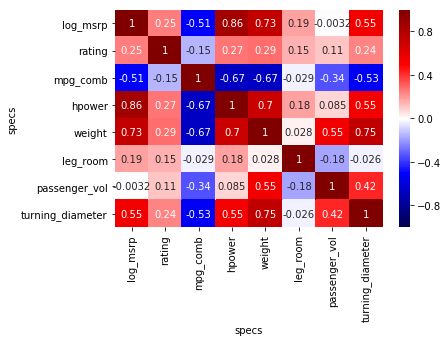

In [132]:
sns.heatmap(cars_num.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

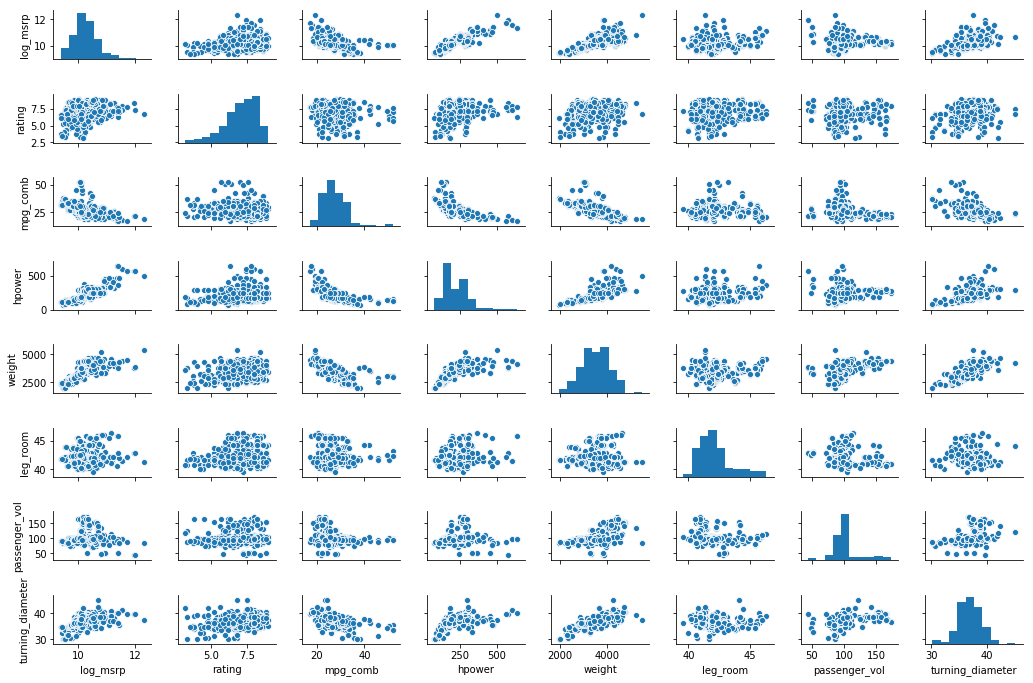

In [133]:
sns.pairplot(cars_num, height=1.2, aspect=1.5);

### Fit a rough OLS model

In [135]:
# statsmodels.formula.api

# Define the model
lm1 = smf.ols('log_msrp ~ rating + hpower + weight + leg_room + passenger_vol + turning_diameter + mpg_comb', data=cars_num)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_msrp   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     391.9
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          4.59e-190
Time:                        13:08:54   Log-Likelihood:                 179.11
No. Observations:                 471   AIC:                            -342.2
Df Residuals:                     463   BIC:                            -309.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0532      0.316     25.520      0.000       7.433       8.673
rating              -0.0062      0.007     -0.891      0.373      -0.020       0.008
hpower               0.0027      0.000     16.912      0.000       0.002       0.003
weight               0.0005   2.89e-05     16.519      0.000       0.000       0.001
leg_room             0.0045      0.006      0.754      0.451      -0.007       0.016
passenger_vol       -0.0068      0.000    -13.775      0.000      -0.008      -0.006
turning_diameter     0.0024      0.005      0.447      0.655      -0.008       0.013
mpg_comb             0.0143      0.002      6.752      0.000       0.010       0.018
==============================================================================
Omnibus:                       23.213   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.516
Skew:                          -0.418   Prob(JB):                     1.43e-07
Kurtosis:                       3.952   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train test split, and then on to cross-validation

In [193]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # calculate adjusted R^2 using the R^2 output by the model
    adj_val_score = 1 - (1-val_score)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Validation adjusted-R^2 score was:', adj_val_score)
    print('Model intercept was:', lr_model.intercept_)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [137]:
# fit a model on the columns of continuous data

X = cars_clean[['rating', 'mpg_comb', 'hpower', 'weight', 'leg_room', 'passenger_vol', 
             'turning_diameter']]
y = cars_clean['log_msrp']

In [194]:
split_and_validate(X, y)


Validation R^2 score was: 0.880406020587156
Validation adjusted-R^2 score was: 0.8707835164964675
Model intercept was: 8.040914741450122
Feature coefficient results: 

rating : -0.01
mpg_comb : 0.01
hpower : 0.00
weight : 0.00
leg_room : 0.00
passenger_vol : -0.01
turning_diameter : 0.00


In [190]:
# add a polynomial term for the rating
# dropping the non-polynomial column does not improve this

X2 = X.copy()
X2['rating^2'] = X2['rating']**2

split_and_validate(X2, y)


Validation R^2 score was: 0.8820480121015561
Validation adjusted-R^2 score was: 0.8710757341575148
Feature coefficient results: 

rating : 0.05
mpg_comb : 0.01
hpower : 0.00
weight : 0.00
leg_room : 0.00
passenger_vol : -0.01
turning_diameter : 0.00
rating^2 : -0.00


In [191]:
# adding an interaction between hpower and weight
# this decreases the R^2 very slightly- odd since horsepower requires a larger engine, which increases the weight

X3 = X2.copy()

X3['hpower/weight'] = X3['hpower']/X3['weight']

split_and_validate(X3, y)


Validation R^2 score was: 0.8810008232674708
Validation adjusted-R^2 score was: 0.8684009104369677
Feature coefficient results: 

rating : 0.06
mpg_comb : 0.01
hpower : 0.00
weight : 0.00
leg_room : 0.01
passenger_vol : -0.01
turning_diameter : 0.00
rating^2 : -0.01
hpower/weight : -3.23


In [173]:
cars_clean['body_style'].value_counts(dropna=False)

4dr car                    206
sport utility              180
2dr car                     51
mini-van, passenger         17
convertible                 12
3dr car                      3
full-size passenger van      2
Name: body_style, dtype: int64

In [195]:
# add dummy variables
# that helped the R^2 a lot! however the effect is mainly due to the increase in number of features since 
# there are a lot of makes. It also (slightly) helped the adjusted R^2, so there is some information gain.
X4 = X.copy()

X4['make'] = cars_clean['make']
X4['body_style'] = cars_clean['body_style'] # alone this decreases the R^2, but together with make it increases R^2 more than make alone
# X4['drivetrain'] = cars_clean['drivetrain'] # alone this only increases R^2 by about .002

split_and_validate(pd.get_dummies(X4), y)


Validation R^2 score was: 0.9401470927954179
Validation adjusted-R^2 score was: 0.8896828769170446
Model intercept was: 7.462999294596997
Feature coefficient results: 

rating : -0.01
mpg_comb : 0.01
hpower : 0.00
weight : 0.00
leg_room : 0.02
passenger_vol : -0.00
turning_diameter : 0.01
make_acura : 0.14
make_audi : 0.21
make_bentley : 0.68
make_bmw : 0.23
make_buick : -0.05
make_cadillac : 0.15
make_chevrolet : -0.12
make_chrysler : -0.23
make_dodge : -0.34
make_fiat : -0.03
make_ford : -0.23
make_genesis : 0.09
make_gmc : -0.16
make_honda : -0.07
make_hyundai : -0.10
make_infiniti : 0.08
make_jeep : -0.20
make_kia : -0.10
make_lexus : 0.13
make_lincoln : -0.03
make_mazda : -0.10
make_mercedes-benz : 0.35
make_mitsubishi : 0.02
make_nissan : -0.17
make_ram : -0.03
make_subaru : -0.04
make_toyota : -0.04
make_volkswagen : -0.10
make_volvo : 0.09
body_style_2dr car : 0.03
body_style_3dr car : 0.03
body_style_4dr car : -0.02
body_style_convertible : 0.05
body_style_full-size passenger

In [248]:
# scaling the horsepower and weight terms makes their betas more interpretable, since they're large numbers that
# don't vary much relative to their size, plus it puts them on the same order of magnitude as leg room and turning diameter

X5 = pd.get_dummies(X4).copy()

X5['hpower/10'] = X5['hpower']/10
X5['weight/100'] = X5['weight']/100

X5 = X5.drop(columns = ['weight', 'hpower'])

X5.head()
split_and_validate(X5, y)


Validation R^2 score was: 0.9401470927954165
Validation adjusted-R^2 score was: 0.8896828769170422
Model intercept was: 7.462999294597064
Feature coefficient results: 

rating : -0.01
mpg_comb : 0.01
leg_room : 0.02
passenger_vol : -0.00
turning_diameter : 0.01
make_acura : 0.14
make_audi : 0.21
make_bentley : 0.68
make_bmw : 0.23
make_buick : -0.05
make_cadillac : 0.15
make_chevrolet : -0.12
make_chrysler : -0.23
make_dodge : -0.34
make_fiat : -0.03
make_ford : -0.23
make_genesis : 0.09
make_gmc : -0.16
make_honda : -0.07
make_hyundai : -0.10
make_infiniti : 0.08
make_jeep : -0.20
make_kia : -0.10
make_lexus : 0.13
make_lincoln : -0.03
make_mazda : -0.10
make_mercedes-benz : 0.35
make_mitsubishi : 0.02
make_nissan : -0.17
make_ram : -0.03
make_subaru : -0.04
make_toyota : -0.04
make_volkswagen : -0.10
make_volvo : 0.09
body_style_2dr car : 0.03
body_style_3dr car : 0.03
body_style_4dr car : -0.02
body_style_convertible : 0.05
body_style_full-size passenger van : -0.03
body_style_mini

In [273]:
cars_final = cars_clean[['log_msrp','rating', 'mpg_comb', 'hpower', 'weight', 'leg_room', 'passenger_vol', 
             'turning_diameter', 'make', 'body_style']].copy()

cars_final['hpower/10'] = cars_final['hpower']/10
cars_final['weight/100'] = cars_final['weight']/100

cars_final = cars_final.drop(columns = ['weight', 'hpower'])

cars_final = pd.get_dummies(cars_final)
cars_final.columns = cars_final.columns.str.replace(',', '').str.replace(' ', '_').str.replace('-', '_')

In [274]:
# pickle the dataframe with the dummy variables

with open('cars_df_cleaned_and_dummies.pickle', 'wb') as write_file:
    pickle.dump(cars_final, write_file)

### Cross validation of vanilla linear regression and regularized regressions

In [3]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection as f_select

# train-test-split and models to test against each other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

# general use
import numpy as np
import sklearn

In [4]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [5]:
X, y = cars_final.drop('log_msrp', axis=1), cars_final['log_msrp']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42) #hold out 20% of the data for final testing

#this helps with the way k-folds will generate indices below
X, y = np.array(X), np.array(y)

In [6]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=3.255)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple regression mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge (lambda=1) mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.9196913688595952, 0.9263601426597603, 0.9310122704594029, 0.9229859899103584, 0.9223060371856541]
Ridge scores:  [0.919457551982129, 0.9257431105401364, 0.9290982299736097, 0.9213240433102993, 0.9238387182756285] 

Simple regression mean cv r^2: 0.924 +- 0.004
Ridge (lambda=1) mean cv r^2: 0.924 +- 0.003


In [7]:
# testing both models against the holdout data
# unsurprisingly they both fit it just as well
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=3.255)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

lm = LinearRegression()
lm.fit(X,y)
print(f'Simple Regression test R^2: {lm.score(X_test, y_test):.3f}')

Ridge Regression test R^2: 0.940
Simple Regression test R^2: 0.940


/home/dave/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


#### Model generalization error of the vanilla regression

In [26]:
# Make predictions on the test set using the new model
lm.fit(X, y)
test_set_pred = lm.predict(X_test)

In [27]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.0830517317688757

In [28]:
r2_score(y_test, test_set_pred)

0.9401470927954169

### Regularization and Cross Validation on Ridge and Lasso to find best alpha

In [11]:
X, y = cars_final.drop('log_msrp', axis=1), cars_final['log_msrp']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42) #hold out 20% of the data for final testing

In [12]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X.values)
X_te = std.transform(X_test.values)

#### Lasso

In [14]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5, random_state=72)
lasso_model.fit(X_tr, y)

LassoCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=72, selection='cyclic', tol=0.0001,
    verbose=False)

In [15]:
# This is the best alpha value it found
lasso_model.alpha_

0.01

In [16]:
# These are the (standardized) coefficients found when it refit using that best alpha

print("LASSO coefficients")
list(zip(list(cars_final.columns)[1:], lasso_model.coef_))

LASSO coefficients


[('rating', -0.0),
 ('mpg_comb', 0.021959122399402724),
 ('leg_room', 0.012437899780564931),
 ('passenger_vol', -0.0604235965403273),
 ('turning_diameter', 0.0),
 ('hpower/10', 0.19944766520375942),
 ('weight/100', 0.1898263839396135),
 ('make_acura', 0.034986225239160645),
 ('make_audi', 0.03473584744105374),
 ('make_bentley', 0.02619716518158507),
 ('make_bmw', 0.05094855597578414),
 ('make_buick', 0.0),
 ('make_cadillac', 0.008235153279144886),
 ('make_chevrolet', -0.002265058455667102),
 ('make_chrysler', -0.010119982919620482),
 ('make_dodge', -0.039352412537149425),
 ('make_fiat', 0.0),
 ('make_ford', -0.03180696998876086),
 ('make_genesis', 0.0056255712566399396),
 ('make_gmc', -0.0),
 ('make_honda', -0.0),
 ('make_hyundai', -0.0030321103023338565),
 ('make_infiniti', 0.01652357856771545),
 ('make_jeep', -0.0192964486865683),
 ('make_kia', -0.002956397510700689),
 ('make_lexus', 0.031110028217875837),
 ('make_lincoln', 0.0002049370171841108),
 ('make_mazda', -0.0),
 ('make_merce

In [17]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [18]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.09793167578750285

In [19]:
r2_score(y_test, test_set_pred)

0.924850901472686

#### Ridge

In [20]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y)

RidgeCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [21]:
# This is the best alpha value it found
ridge_model.alpha_

3.2550885998350596

In [22]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
print("RIDGE coefficients")
list(zip(list(cars_final.columns)[1:], ridge_model.coef_))

RIDGE coefficients


[('rating', -0.011687201316876155),
 ('mpg_comb', 0.05644516742319228),
 ('leg_room', 0.02452392113823837),
 ('passenger_vol', -0.06457911600226293),
 ('turning_diameter', 0.026918587544626157),
 ('hpower/10', 0.2016096210050813),
 ('weight/100', 0.1921135236629062),
 ('make_acura', 0.0379310163614344),
 ('make_audi', 0.04270795659666516),
 ('make_bentley', 0.03786890876970323),
 ('make_bmw', 0.054727665574611804),
 ('make_buick', -0.0019481486465966738),
 ('make_cadillac', 0.017220414380085602),
 ('make_chevrolet', -0.019193556646925465),
 ('make_chrysler', -0.020895082265360167),
 ('make_dodge', -0.051112111224605766),
 ('make_fiat', 0.0012700714912888928),
 ('make_ford', -0.047797820811732755),
 ('make_genesis', 0.014126745508742584),
 ('make_gmc', -0.01191681577034209),
 ('make_honda', -0.008128943083372904),
 ('make_hyundai', -0.01326349245263938),
 ('make_infiniti', 0.023435804705581886),
 ('make_jeep', -0.03080726384487341),
 ('make_kia', -0.014789529383974983),
 ('make_lexus', 

In [23]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [24]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.0827004738367711

In [25]:
r2_score(y_test, test_set_pred)

0.9402629353757478

In [54]:
# R^2 is similar across all the models, but Lasso is simpler to interpret since it eliminates variables, so I
# select it as my champion model

X, y = cars_final.drop('log_msrp', axis=1), cars_final['log_msrp']

std = StandardScaler()
std.fit(X.values)

X = std.transform(X.values)

lasso_model_final = Lasso(alpha = 0.01)
lasso_model_final.fit(X, y)

print("Model intercept: " + str(lasso_model_final.intercept_))
print("Model coefficients:\n")
for i in list(zip(list(cars_final.columns)[1:], lasso_model.coef_)):
    if abs(i[1]) > 0:
        print(i)

print('\n',lasso_model_final.score(X,y))

Model intercept: 10.255925174539904
Model coefficients:

('mpg_comb', 0.0213984176497565)
('leg_room', 0.014039529447285507)
('passenger_vol', -0.07065254242074914)
('hpower/10', 0.2072934586644271)
('weight/100', 0.19372508699105034)
('make_acura', 0.03829362057723787)
('make_audi', 0.03380003223863795)
('make_bentley', 0.022649980061881816)
('make_bmw', 0.05271423440762023)
('make_cadillac', 0.01558432875452987)
('make_chevrolet', -0.0026959988904805437)
('make_chrysler', -0.011892023167193082)
('make_dodge', -0.038602778435285874)
('make_ford', -0.03376209555090554)
('make_genesis', 0.0011234321092672272)
('make_gmc', -0.000406286829140635)
('make_hyundai', -0.004041853953587949)
('make_infiniti', 0.015612735504960557)
('make_jeep', -0.015341409763060152)
('make_kia', -0.005672171192529889)
('make_lexus', 0.02677823537835403)
('make_mercedes_benz', 0.04396482455751271)
('make_nissan', -0.014373757868049872)
('make_volvo', 0.010144288280502506)
('body_style_convertible', 0.0094171519